<a href="https://colab.research.google.com/github/Uzi78/ML_Projects/blob/main/Math_Grade_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Math grades of student using Linear Regresiion**

The Student Math Score Prediction project focuses on forecasting the math scores of students by analyzing various factors such as study habits, previous grades, family background, and demographic information. By applying linear regression, this project aims to uncover the relationships between these variables and students' math scores. The insights gained can assist educators in identifying key factors that influence students' math performance, enabling more targeted interventions to improve academic outcomes.

## **Objectives**
Predict Math Scores: Develop a predictive model to forecast a student's math score based on relevant input features.

Identify Key Factors: Analyze which variables have the most significant impact on students' math performance.

Apply Linear Regression: Implement and train a linear regression model to explore the relationship between the selected features and the math scores.

Evaluate Model Performance: Assess the accuracy of the model using the Mean Squared Error (MSE) metric to quantify the prediction error.

Visualize Findings: Create visual representations, such as scatter plots, to illustrate the model's performance in predicting math scores.

## **Import Library and Load the Dataset**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


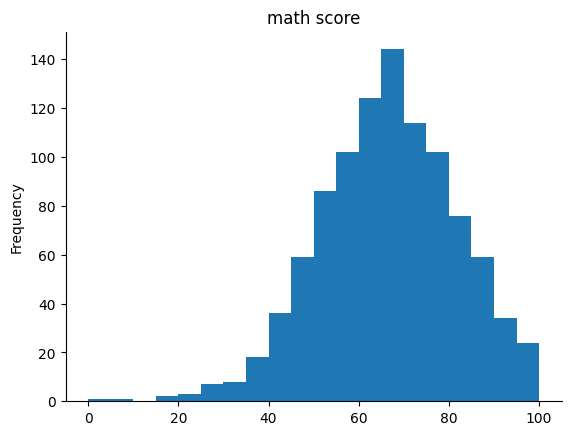

In [ ]:
from matplotlib import pyplot as plt
data['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Data Exploration**

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## **Data Preprocessing**

### Convert Variables

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
print(data.head())

   math score  reading score  writing score  gender_male  \
0          72             72             74        False   
1          69             90             88        False   
2          90             95             93        False   
3          47             57             44         True   
4          76             78             75         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1                   Fals

### Fetaure Selection


In [ ]:
X = data.drop(['math score'], axis=1)
Y = data['math score']

In [ ]:
from sklearn.model_selection import train_test_split

### Splitting the data

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

(800, 14) (200, 14) (200,) (800,)


In [ ]:
from sklearn.linear_model import LinearRegression

## Model Training

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [ 0.23602256  0.72414793 13.06488386  0.3593228  -0.62561715 -0.61323624
  4.89264896 -0.71690113  0.92931227 -1.40048884  0.99885615  0.75647016
  3.51007489  3.28964236]
Intercept: -10.912497209409949


In [ ]:
from sklearn.metrics import mean_squared_error

## Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,y_pred) )

MSE:  29.095169866715487


## **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

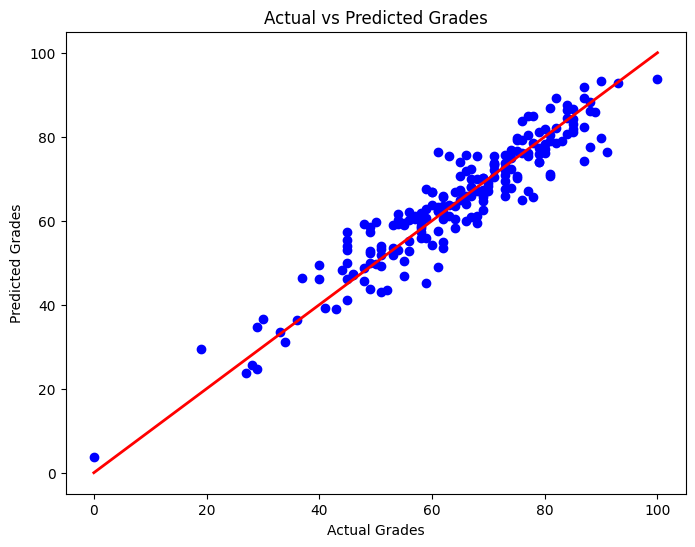

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.show()
